In [4]:
%pip install mysql-connector-python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


Note: you may need to restart the kernel to use updated packages.


In [5]:
#1. Import the required libraries and load the data
# Load the required libraries and read the dataset.
#   Check the first few samples, shape, info of the data and try to familiarize yourself with different 

df = pd.read_csv('C://pro9//Copy of events.csv')
df.head()



,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [6]:

df1 = pd.read_csv('C://pro9//Copy of gender_age.csv')
df.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [7]:
df2 = pd.read_csv('C://pro9//Copy of phone_device.csv')
df.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [8]:
df.shape

(3252950, 5)

In [9]:
df1.shape

(74645, 4)

In [10]:
df2.shape

(187245, 3)

In [11]:
#2. Data cleansing and Exploratory data analysis: [ Score: 8 point
# Check if there are any duplicate records in the dataset? If any drop th

def check_duplicate(df):
    duplicate=df[df.duplicated()]
    return duplicate

duplicate=check_duplicate(df)
duplicate

,event_id,device_id,timestamp,longitude,latitude


In [12]:

def check_duplicate(df1):
    duplicate=df1[df1.duplicated()]
    return duplicate

duplicate=check_duplicate(df1)
duplicate

,device_id,gender,age,group


In [13]:

def check_duplicate(df2):
    duplicate=df2[df2.duplicated()]
    return duplicate

duplicate=check_duplicate(df2)
duplicate
dropped_duplicate=df2.drop_duplicates()
display(dropped_duplicate)




,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2
...,...,...,...
187239,3210973037848940984,小米,MI 2S
187240,7979541072208733273,小米,MI 4
187241,-187404680852357705,小米,红米2
187242,-2718274279595622821,小米,MI 3


In [14]:
display(df2)

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2
...,...,...,...
187240,7979541072208733273,小米,MI 4
187241,-187404680852357705,小米,红米2
187242,-2718274279595622821,小米,MI 3
187243,3098391762071677791,vivo,X1


In [15]:
 #Merge the data into a single frame
df_Original = pd.concat([df,df1, df2], axis=1, sort=False) 
dfc = df_Original.copy(deep=True) 
display(dfc)


,event_id,device_id,timestamp,longitude,latitude,device_id,gender,age,group,device_id,phone_brand,device_model
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,-8.076088e+18,M,35.0,M32-38,-8.890649e+18,小米,红米
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,-2.897162e+18,M,35.0,M32-38,1.277780e+18,小米,MI 2
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70,-8.260684e+18,M,35.0,M32-38,5.137428e+18,三星,Galaxy S4
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28,-4.938849e+18,M,30.0,M29-31,3.669464e+18,SUGAR,时尚手机
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66,2.451335e+17,M,30.0,M29-31,-5.019278e+18,三星,Galaxy Note 2
...,...,...,...,...,...,...,...,...,...,...,...,...
3252945,3252946,-8995272658520685777,2016-05-07 23:14:17,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3252946,3252947,6790350461641275817,2016-05-07 23:14:08,120.65,27.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3252947,3252948,7111660304904287709,2016-05-07 23:35:33,121.40,31.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3252948,3252949,2786044170600788970,2016-05-07 23:36:03,111.19,31.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Check for missing values in each column of the dataset? If it exists, handle them accordingly.
def check_missing_values(dfc):
    '''Function to check the missing data percentage'''
    print("percentage of missing data of dataframe \n",dfc.isnull().sum()/len(dfc)*100)
    
check_missing_values(dfc)

percentage of missing data of dataframe 
 event_id         0.000000
device_id        0.000000
timestamp        0.000000
longitude        0.000000
latitude         0.000000
device_id       97.705314
gender          97.705314
age             97.705314
group           97.705314
device_id       94.243840
phone_brand     94.243840
device_model    94.243840
dtype: float64


In [17]:
## Let us check the statistical summary of the numerical variables
dfc.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
event_id,3252950.0,1.626476e+06,9.390459e+05,1.000000e+00,8.132382e+05,1.626476e+06,2.439713e+06,3.252950e+06
device_id,3252950.0,-2.685140e+16,5.301236e+18,-9.222957e+18,-4.616259e+18,-1.729953e+16,4.549750e+18,9.222540e+18
longitude,3252950.0,7.796192e+01,5.405801e+01,-1.800000e+02,0.000000e+00,1.129500e+02,1.172100e+02,1.747600e+02
latitude,3252950.0,2.162949e+01,1.569697e+01,-3.843000e+01,0.000000e+00,2.802000e+01,3.407000e+01,5.994000e+01
device_id,74645.0,-7.491354e+14,5.327150e+18,-9.223067e+18,-4.617367e+18,-1.841362e+16,4.636656e+18,9.222849e+18
age,74645.0,3.141034e+01,9.868735e+00,1.000000e+00,2.500000e+01,2.900000e+01,3.600000e+01,9.600000e+01
device_id,187245.0,-1.426513e+16,5.330527e+18,-9.223322e+18,-4.645265e+18,-2.619149e+16,4.606568e+18,9.223069e+18


In [18]:
## Let us check the statistical summary of the categorical variables
dfc.select_dtypes(include='O').describe()

,timestamp,gender,group,phone_brand,device_model
count,3252950,74645,74645,187245,187245
unique,588125,2,12,131,1599
top,2016-05-03 10:00:03,M,M23-26,小米,红米note
freq,43,47904,9605,43210,7358


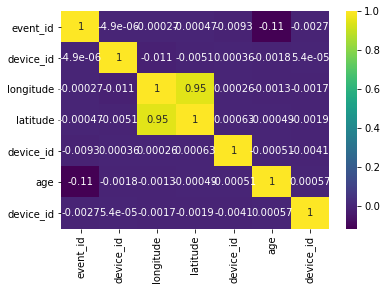

In [19]:
 #Perform the data visualization on the dataset to gain some basic insights 
sns.heatmap(dfc.corr(),annot=True,cmap='viridis')
plt.show()

In [20]:
dfc.dtypes


event_id          int64
device_id         int64
timestamp        object
longitude       float64
latitude        float64
device_id       float64
gender           object
age             float64
group            object
device_id       float64
phone_brand      object
device_model     object
dtype: object

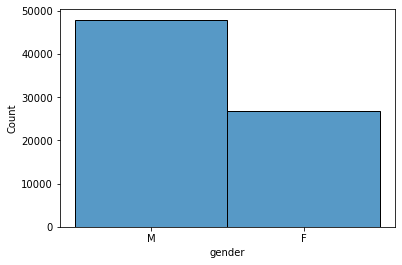

In [21]:
sns.histplot(df1['gender'])
plt.show()

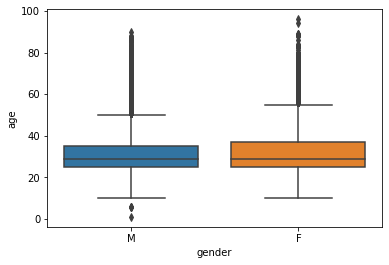

In [22]:
sns.boxplot(df1['gender'],df1['age'])
plt.show()

In [23]:
#Encode the categorical variables in the dataset.
#   Drop irrelevant columns like 'timestamp','event_id','device_id' etc from the dataset.e
object_type_variables = [i for i in df.columns if df.dtypes[i] == object]
object_type_variables 


le = LabelEncoder()



In [24]:
def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))  
        dfc[i] = q                               
        dfc[i] = df[i].astype(int)
encoder(df)        


ValueError: invalid literal for int() with base 10: '2016-05-01 00:55:25'

In [ ]:
df.head(2)

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,3586,121.38,31.24
1,2,-6401643145415154744,3514,103.65,30.97


In [ ]:
df1

,device_id,gender,age,group
0,-8076087639492063270,1,35,2
1,-2897161552818060146,1,35,2
2,-8260683887967679142,1,35,2
3,-4938849341048082022,1,30,11
4,245133531816851882,1,30,11
...,...,...,...,...
74640,4682031842235089751,1,30,11
74641,-9178703742877135986,1,30,11
74642,180946546684162312,1,20,8
74643,1390702386071991851,1,37,2




Do you wish to drop any columns ?  <yes> or <no>


In [ ]:
from colorama import Fore, Back, Style
answer_drop=str(input())
print(Fore.GREEN+"\n\nDo you wish to drop any columns ? ",Fore.BLACK+"<yes> or <no>")
print("Enter the columns to drop")


if answer_drop=='yes':
    print(Fore.GREEN+"\nEnter the column names seprated by",Fore.BLACK+"<,>")
    print(Style.RESET_ALL)
    Drop_col=str(input())
    Trans = list(Drop_col.split(","))
    for i in range(len(Trans)):
        a=Trans[i]
        dfc = dfc.drop(Drop_col,axis=1)



Do you wish to drop any columns ?  <yes> or <no>
Enter the columns to drop


In [1]:
import mysql.connector
mydb= mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="Yuva@2022"
    )
print(mydb)

In [2]:
import mysql.connector
mydb= mysql.connector.connect(
    host="localhost",
    user="Thenmozhi",
    passwd="Yuva@2022"
    )
print(mydb)

In [3]:
import mysql.connector
mydb= mysql.connector.connect(
    host="localhost",
    user="Thenmozhi",
    passwd="Yuva@2022",
    database="customerchurn"
    )
print(mydb)